In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.linalg
import scipy.signal
import nengo
import matplotlib.pyplot as plt
import tqdm

import sys
sys.path.append('../../lib')
from temporal_encoder_common import *

In [3]:
def mk_sig(N, dt, high=5.0):
    return nengo.processes.WhiteSignal(period=dt*N, high=high).run(dt * N, dt=dt)[:, 0] + np.random.normal(0, 1)

def mk_sig_lp(N, dt, tau=0.1, order=1, rng=np.random):
    ts = np.arange(N) * dt
    xs = rng.normal(0, 1, N)
    xs = scipy.signal.fftconvolve(xs, Filters.lowpass(tau, order)(ts, dt))[:N] * dt
    xs /= np.max(np.abs(xs))
    return xs

In [4]:
T = 1.0
dt = 1e-3
ts = np.arange(0, T, dt)

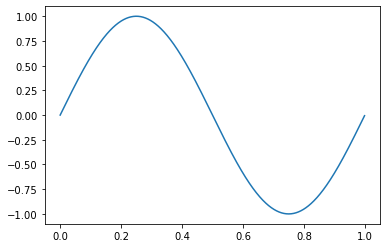

In [5]:
A, B = np.array((
    (0.0, -2.0 * np.pi),
    (2.0 * np.pi, 0.0),
)), np.array((1.0, 0.0))



fig, ax = plt.subplots()
ax.plot(ts, Filters.lti(A, B, 1)(ts, dt))

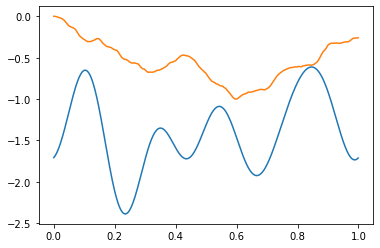

In [6]:
fig, ax = plt.subplots()
ax.plot(ts, mk_sig(1000, 1e-3))
ax.plot(ts, mk_sig_lp(1000, 1e-3))

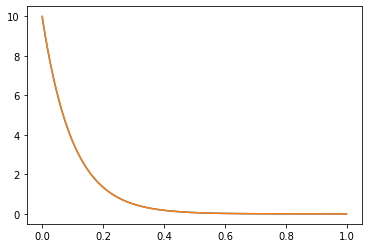

In [7]:
fig, ax = plt.subplots()
ax.plot(ts, Filters.lowpass(0.1, 0.0)(ts, dt))
ax.plot(*scipy.signal.impulse(Filters.lowpass_laplace(0.1, 0), T=ts))

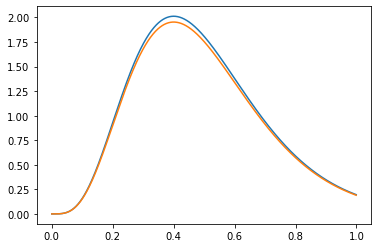

In [22]:
fig, ax = plt.subplots()
ax.plot(ts, Filters.lowpass(0.1, 4)(ts, dt))
ax.plot(*scipy.signal.impulse(Filters.lowpass_laplace(0.1, 4), T=ts))

In [ ]:
fig, ax = plt.subplots()
ax.plot(ts, Filters.lowpass(0.1, 4)(ts, dt))
ax.plot(*scipy.signal.impulse(Filters.lowpass_laplace(0.1, 4), T=ts))

In [24]:
solve_for_linear_dynamics(
    [Filters.lowpass(100e-3), Filters.lowpass(100e-3), Filters.lowpass(100e-3)],
    [Filters.dirac(), Filters.lowpass(10e-3), Filters.lowpass(20e-3)],
    [Filters.lowpass(10e-3), Filters.lowpass(20e-3)],
    T=10.0,
    N_smpls=1000,
    sigma=None,
)

100%|██████████| 1000/1000 [00:02<00:00, 388.85it/s]


array([[ 1.04645940e+01,  5.10151682e+00],
       [-9.46459399e+00,  1.77635684e-14],
       [-8.88178420e-15, -4.10151682e+00]])

In [25]:
tau = 100e-3
solve_for_linear_dynamics([
    Filters.lowpass(tau),
    Filters.lowpass(tau)
], [
    Filters.dirac(),
    Filters.step()
], [
    Filters.step()
])

100%|██████████| 1000/1000 [00:02<00:00, 478.07it/s]


array([[0.09950083],
       [1.        ]])

In [26]:
tau0B = 10e-3
tau1B = 20e-3

tau0A = 100e-3
tau1A = 110e-3

solve_for_linear_dynamics(
    [Filters.lowpass(tau0B, 1), Filters.lowpass(tau1B, 1), Filters.lowpass(tau0A, 1), Filters.lowpass(tau1A, 1)],
    [Filters.dirac(), Filters.dirac(), Filters.lowpass(1000e-3, 0), Filters.lowpass(1000e-3, 0)],
    [Filters.lowpass(1000e-3, 0)],
    T=10.0,
    N_smpls=1000,
    sigma=None,
)

100%|██████████| 1000/1000 [00:03<00:00, 323.85it/s]


array([[-0.1106065 ],
       [ 0.21351313],
       [ 5.63271975],
       [-4.74718212]])

In [27]:
tau0B = 10e-3
tau1B = 20e-3
tau2B = 30e-3

tau0A = 100e-3
tau1A = 110e-3
tau2A = 120e-3

solve_for_linear_dynamics(
    [Filters.lowpass(tau0B, 1), Filters.lowpass(tau1B, 1), Filters.lowpass(tau2B, 1),
     Filters.lowpass(tau0A, 1), Filters.lowpass(tau1A, 1), Filters.lowpass(tau2A, 1)],
    [Filters.dirac(), Filters.dirac(), Filters.dirac(),
     Filters.step(), Filters.step(), Filters.step()],
    [Filters.step()],
    T=10.0,
    N_smpls=10000,
    sigma=None,
)

100%|██████████| 10000/10000 [00:40<00:00, 244.65it/s]


array([[  0.09151567],
       [ -0.25566802],
       [  0.277491  ],
       [ 16.94779382],
       [-27.65461601],
       [ 11.70703597]])

In [160]:
tau0 = 30e-3
tau1 = 100e-3

solve_for_linear_dynamics(
    [Filters.lowpass(tau0, 1), Filters.lowpass(tau1, 1)],
    [Filters.dirac(), Filters.step()],
    [Filters.step()],
    T=10.0,
    N_smpls=10000,
    sigma=None,
)

100%|██████████| 10000/10000 [00:21<00:00, 460.11it/s]


array([[0.1582848 ],
       [1.00393082]])

In [29]:
tau0B = 100e-3
tau1B = 110e-3
tau2B = 120e-3

tau0A = 200e-3
tau1A = 210e-3
tau2A = 220e-3

solve_for_linear_dynamics(
    [Filters.lowpass(tau0B, 1), Filters.lowpass(tau1B, 1), Filters.lowpass(tau2B, 1),
     Filters.lowpass(tau0A, 1), Filters.lowpass(tau1A, 1), Filters.lowpass(tau2A, 1)],
    [Filters.dirac(), Filters.dirac(), Filters.dirac(),
     Filters.lowpass(2e-3), Filters.lowpass(2e-3), Filters.lowpass(2e-3)],
    [Filters.lowpass(2e-3)],
    T=10.0,
    N_smpls=10000,
    sigma=None,
    rcond=1e-4,
)

100%|██████████| 10000/10000 [00:40<00:00, 247.71it/s]


array([[ 327.24584321],
       [-812.56337089],
       [ 519.44449552],
       [   7.50289996],
       [-192.48967851],
       [ 151.82985298]])